In [2]:
!pip install dask
!pip install numpy
!pip install pandas
!pip install pyarrow

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [13]:
raw_file_path = r"..\data\US_Accidents_March23.csv"
chunk_size = 100000  # Adjust based on available memory
raw_data_file_frame = ""

In [37]:

def read_large_csv(file_path, chunk_size):
    """Reads a large CSV file in chunks and returns a generator of chunks."""
    return pd.read_csv(file_path, chunksize=chunk_size, low_memory=False)

def process_large_csv(file_path, chunk_size=100000):
    """Processes the large CSV file and returns the cleaned DataFrame."""
    df_combined = pd.DataFrame()

    for chunk in read_large_csv(file_path, chunk_size):
        df_combined = pd.concat([df_combined, chunk], ignore_index=True)

    return df_combined


def drop_columns(data_frame):
    cols_to_drop = ['ID', 'Source', 'End_Lat', 'End_Lng', 'Distance(mi)', 
                    'Description', 'Airport_Code', 'Pressure(in)', 
                    'Wind_Direction', 'Precipitation(in)', 
                    'Amenity','Give_Way', 'No_Exit', 'Traffic_Calming', 
                    'Turning_Loop', 'Nautical_Twilight', 'Astronomical_Twilight',
                    'Civil_Twilight','Airport_Code','Sunrise_Sunset'
                    ]
    return data_frame.drop(cols_to_drop, axis=1)


def split_and_save_by_state(data_frame, output_dir=r"..\data\state_wise_data"):
    """Splits data by state and saves it into separate CSV files."""
    os.makedirs(output_dir, exist_ok=True)

    for state, state_df in data_frame.groupby("State"):
        if (state == 'FL' or state == 'CA' or state == 'VA' or state == 'NY') :
            state_file = os.path.join(output_dir, f"{state}_org.csv")
            state_df.to_csv(state_file, index=False)
    print(f"Data saved for FA, CA, VA, NY \n ")


def print_summary(data_frame):
    print("** Data Frame Info: \n")
    print(f"{data_frame.info()}")
    print("\n ** Data Frame description: \n")
    print(data_frame.describe(include="all"))


def plot_histogram_state_vs_accident_count(data_frame):
    """Analyzes the state-wise accident count and plots a histogram."""
    state_counts = data_frame["State"].value_counts()
    
    print(f"\nNumber of unique states: {state_counts.count()}")

    # Plot histogram for state vs accident count
    plt.figure(figsize=(12, 6))
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))   
    state_counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.xlabel("State")
    plt.ylabel("Total Accidents")
    plt.title("Total Accidents by State")
    plt.xticks(rotation=90)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


def plot_histogram_weather_condition_vs_accident_count(data_frame):
    """Analyzes the state-wise accident count and plots a histogram."""
    weather_condition = data_frame["Weather_Condition"].value_counts()
    
    plt.figure(figsize=(25, 20))
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))   
    weather_condition.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.xlabel("State")
    plt.ylabel("Total Accidents")
    plt.title("Total Accidents by State")
    plt.xticks(rotation=90)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [29]:
raw_data_file_frame = process_large_csv(raw_file_path, chunk_size)

In [25]:
print_summary(raw_data_file_frame)


** Data Frame Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 

                                                         **** Data Analysis for Florida *****


Number of unique states: 49


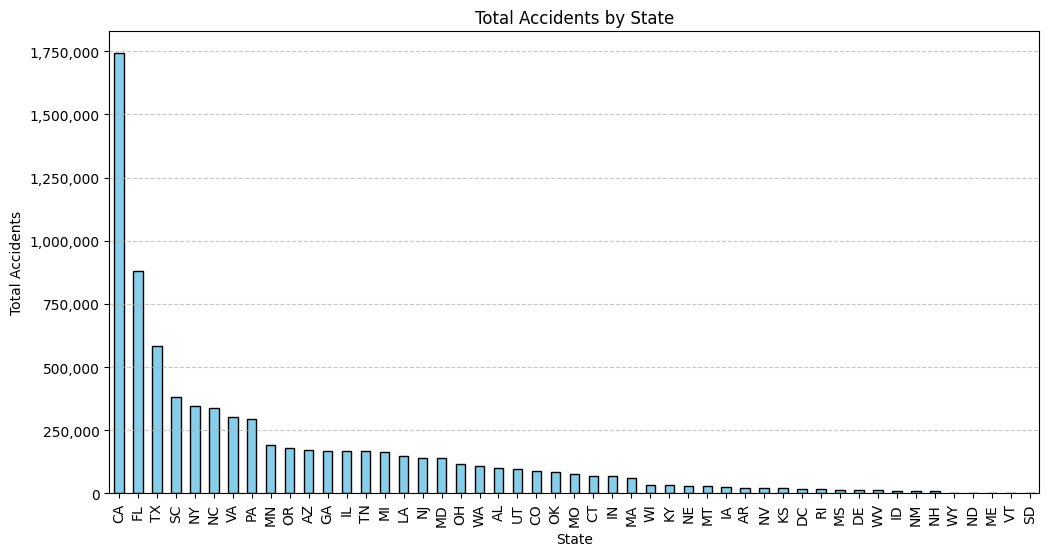

In [28]:
plot_histogram_state_vs_accident_count(raw_data_file_frame)


In [30]:
raw_data_file_frame = drop_columns(raw_data_file_frame)
print("\n Dataframe after droping roes: \n",raw_data_file_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Street             object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Zipcode            object 
 10  Country            object 
 11  Timezone           object 
 12  Weather_Timestamp  object 
 13  Temperature(F)     float64
 14  Wind_Chill(F)      float64
 15  Humidity(%)        float64
 16  Visibility(mi)     float64
 17  Wind_Speed(mph)    float64
 18  Weather_Condition  object 
 19  Bump               bool   
 20  Crossing           bool   
 21  Junction           bool   
 22  Railway            bool   
 23  Roundabout         bool   
 24  Station            bool   
 25  Stop              

raw_data_file_frame:  [3 2 1 4]


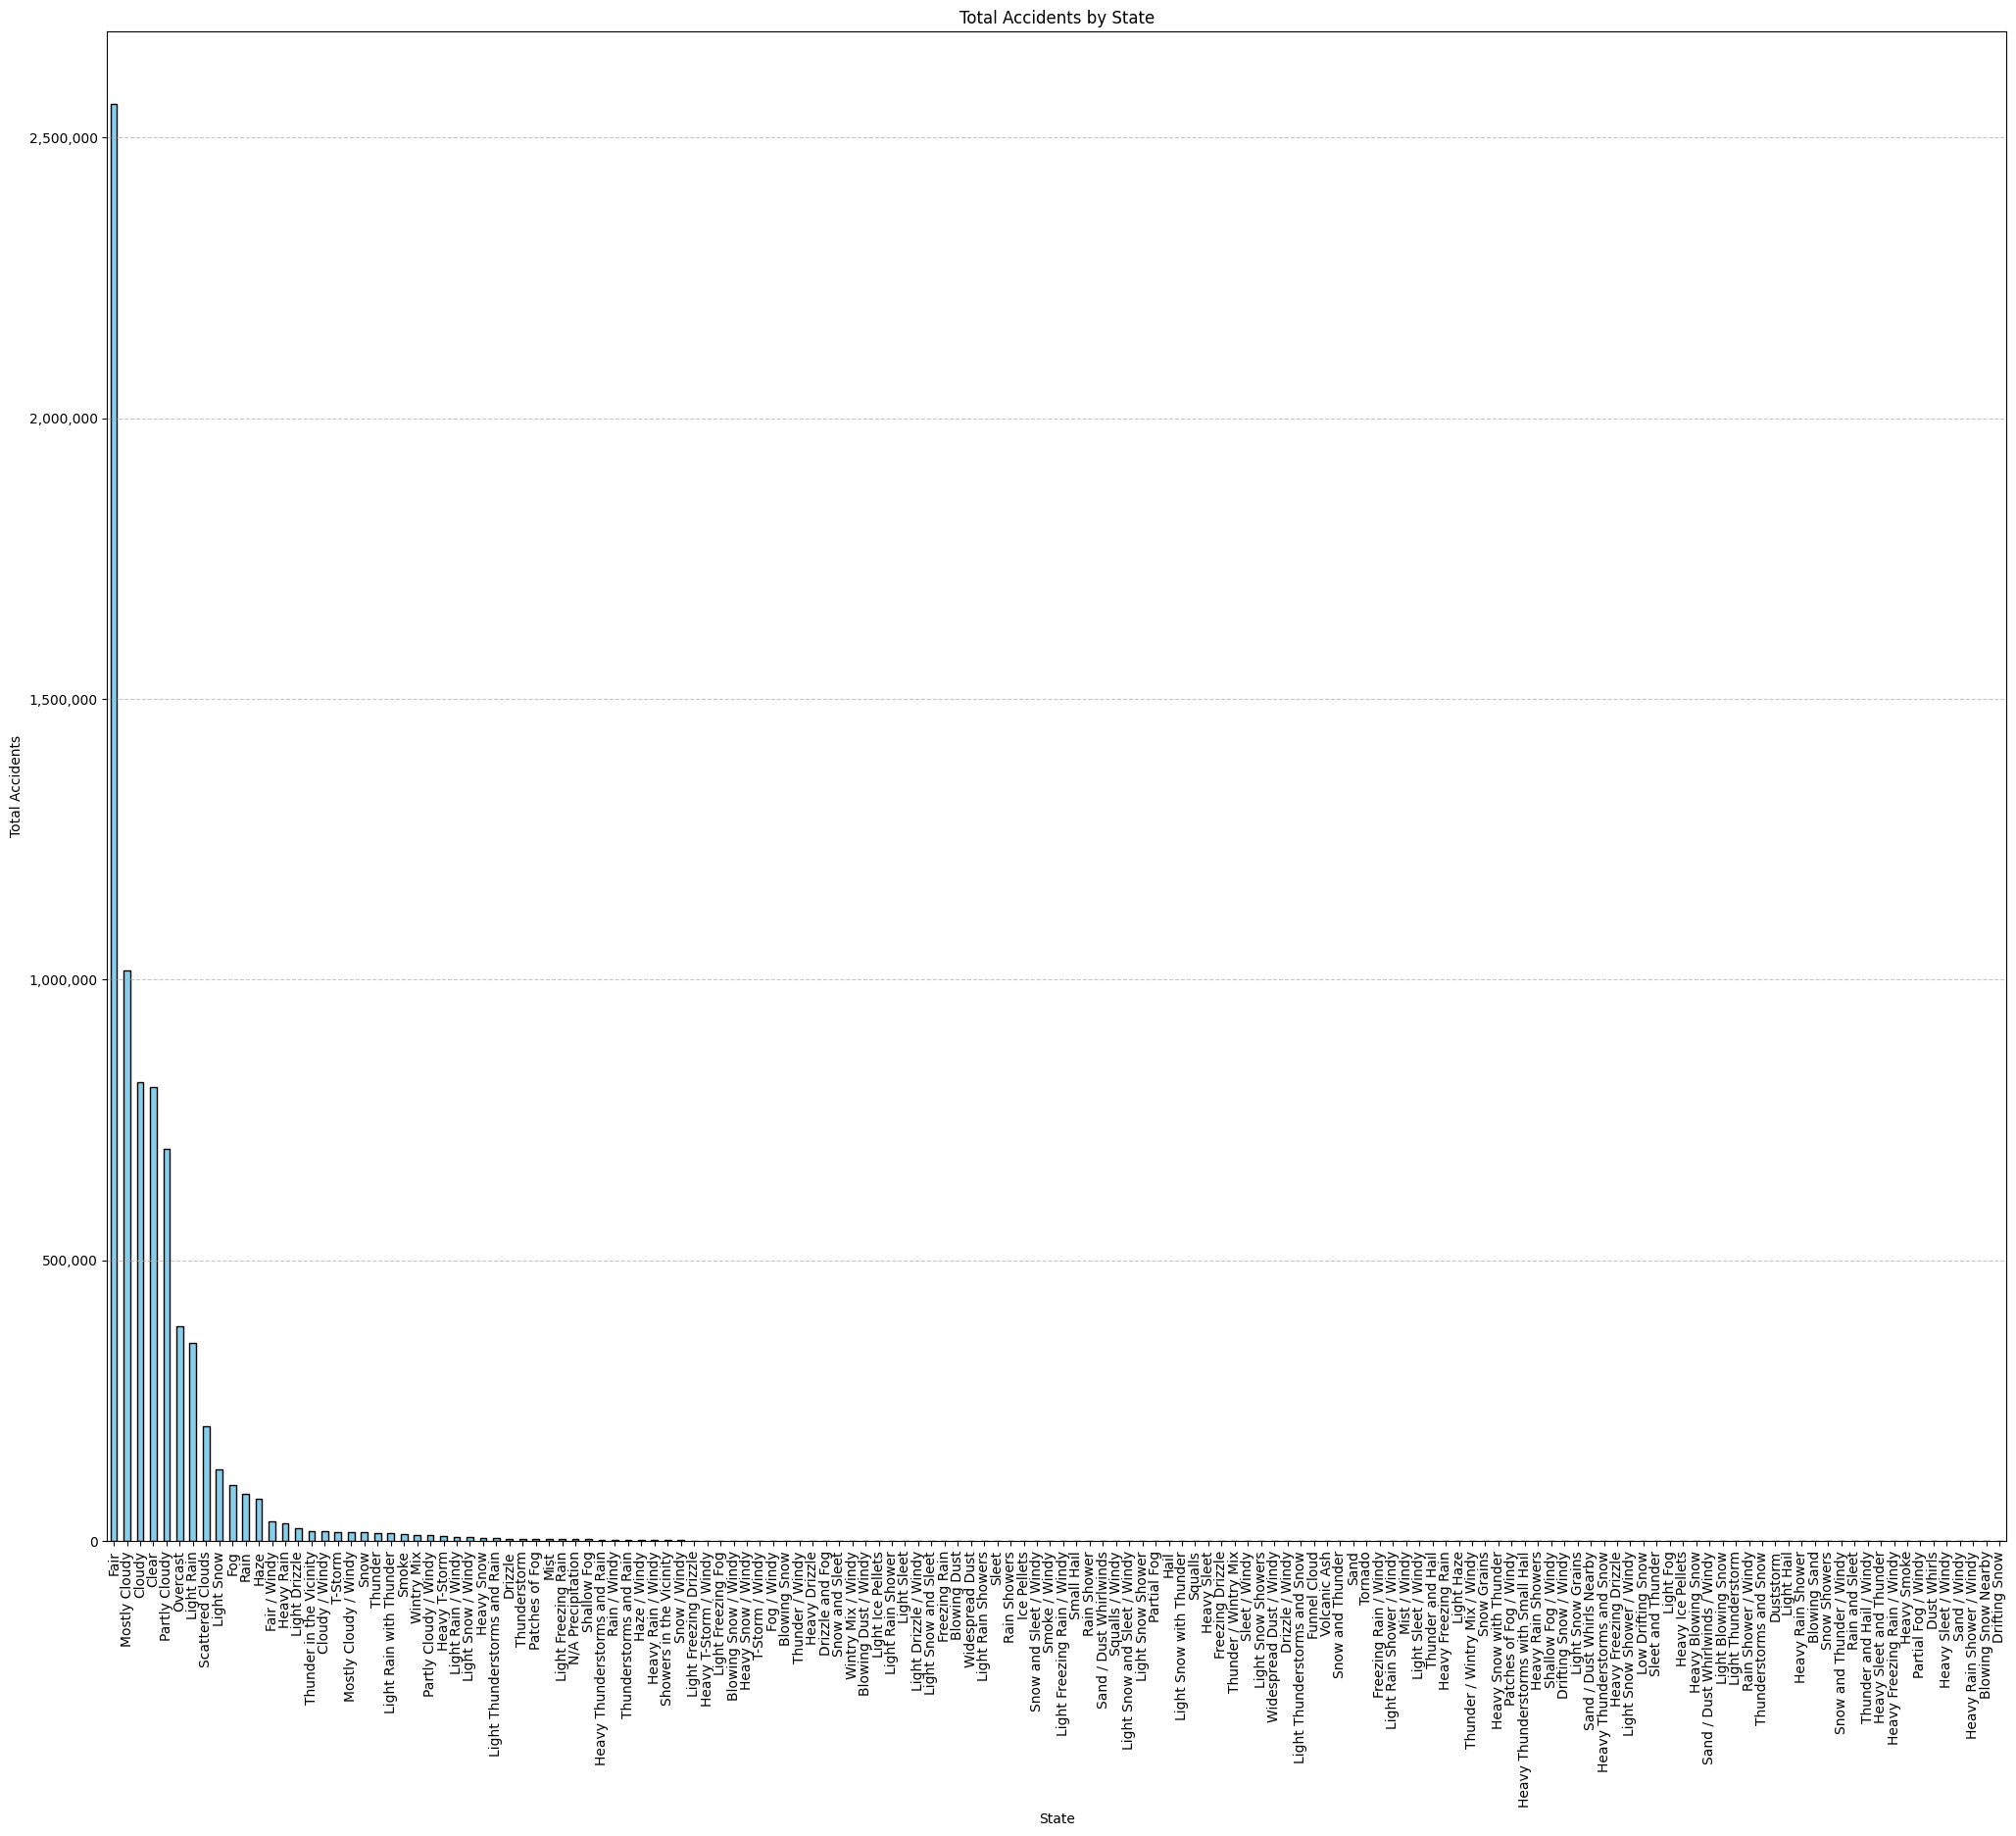

In [38]:
print("raw_data_file_frame: ", raw_data_file_frame['Severity'].unique())
#print("raw_data_file_frame: ", raw_data_file_frame['Weather_Condition'].unique())

plot_histogram_weather_condition_vs_accident_count(raw_data_file_frame)

In [40]:
missing_data = pd.DataFrame(raw_data_file_frame.isnull().sum()).reset_index()
missing_data.columns = ['Feature', 'Missing_Percent(%)']
missing_data['Missing_Percent(%)'] = missing_data['Missing_Percent(%)'].apply(lambda x: x / raw_data_file_frame.shape[0] * 100)
missing_data.loc[missing_data['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
5,Street,0.140637
6,City,0.003274
9,Zipcode,0.024779
11,Timezone,0.101030
12,Weather_Timestamp,1.555666
13,Temperature(F),2.120143
14,Wind_Chill(F),25.865904
15,Humidity(%),2.253301
16,Visibility(mi),2.291524
17,Wind_Speed(mph),7.391355


In [ ]:
raw_data_file_frame = raw_data_file_frame.drop(['Wind_Chill(F)'], axis=1)
print("\n Dataframe after droping roes: \n",raw_data_file_frame.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Street             object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Zipcode            object 
 10  Country            object 
 11  Timezone           object 
 12  Weather_Timestamp  object 
 13  Temperature(F)     float64
 14  Humidity(%)        float64
 15  Visibility(mi)     float64
 16  Wind_Speed(mph)    float64
 17  Weather_Condition  object 
 18  Bump               bool   
 19  Crossing           bool   
 20  Junction           bool   
 21  Railway            bool   
 22  Roundabout         bool   
 23  Station            bool   
 24  Stop               bool   
 25  Traffic_Signal    

In [43]:
print("Row count:", raw_data_file_frame.shape[0])

raw_data_file_frame = raw_data_file_frame.dropna(subset=['City','Zipcode','Street',
                       'Zipcode','County','Timezone','Weather_Timestamp'])
print("Row count:", raw_data_file_frame.shape[0])


Row count: 7728394
Row count: 7597281


In [44]:
split_and_save_by_state(raw_data_file_frame)

Data saved for FA, CA, VA, NY 
 
